In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!pip install pyspark
!apt install openjdk-8-jdk-headless

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488493 sha256=4bfe7b2d1610159a99282ab09cd540f9c912918b267566f8158b7d9eb6512813
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libxtst6 openjdk-8-jre-headless
Suggested packages:
  openjdk-8-demo openjdk-8-source libnss-mdns fonts-dejavu-extra fonts-nanum fonts-ipafont-gothic
  fonts-ipafont-mincho fonts-wqy-microhei fonts-wqy-zenhei fonts-indic
The following NEW packages will be installed:
  libxtst6 openjdk-8-jdk-headless openjdk-8-jre-headless
0 upgraded, 3 newly installed, 0 to remove and 35 not upgraded.
Need to get 39.7 MB of archives.
After this

In [5]:
import pyspark

In [6]:
from pyspark import SparkConf, SparkContext
from pyspark.sql import SQLContext, SparkSession
import warnings
warnings.filterwarnings('ignore')

In [7]:
spark = SparkSession.builder\
        .master("local")\
        .appName("Colab")\
        .config('spark.ui.port', '4050')\
        .getOrCreate()

In [8]:
sql_context=SQLContext

In [9]:
# load the data set
df=spark.read.format("com.databricks.spark.csv").options(header="true",inferschema='true').load('/content/drive/MyDrive/Colab Notebooks/Mall_Customers.csv')

**BASICS CHECKS**

In [10]:
#checking the datas of our dataset
df.show()

+----------+------+---+------------------+----------------------+
|CustomerID| Genre|Age|Annual Income (k$)|Spending Score (1-100)|
+----------+------+---+------------------+----------------------+
|         1|  Male| 19|                15|                    39|
|         2|  Male| 21|                15|                    81|
|         3|Female| 20|                16|                     6|
|         4|Female| 23|                16|                    77|
|         5|Female| 31|                17|                    40|
|         6|Female| 22|                17|                    76|
|         7|Female| 35|                18|                     6|
|         8|Female| 23|                18|                    94|
|         9|  Male| 64|                19|                     3|
|        10|Female| 30|                19|                    72|
|        11|  Male| 67|                19|                    14|
|        12|Female| 35|                19|                    99|
|        1

In [11]:
df.printSchema()

root
 |-- CustomerID: integer (nullable = true)
 |-- Genre: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Annual Income (k$): integer (nullable = true)
 |-- Spending Score (1-100): integer (nullable = true)



In [12]:
df.describe()

DataFrame[summary: string, CustomerID: string, Genre: string, Age: string, Annual Income (k$): string, Spending Score (1-100): string]

In [13]:
df.describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
CustomerID,200,100.5,57.879184513951124,1,200
Genre,200,None,None,Female,Male
Age,200,38.85,13.96900733155888,18,70
Annual Income (k$),200,60.56,26.26472116527124,15,137
Spending Score (1-100),200,50.2,25.823521668370173,1,99


In [14]:
df.columns

['CustomerID', 'Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

In [15]:
type(df)

pyspark.sql.dataframe.DataFrame

In [16]:
#rename column name
df=df.withColumnRenamed('CustomerID','Id')
df=df.withColumnRenamed('Annual Income (k$)','AnnualIncome')
df=df.withColumnRenamed('Spending Score (1-100)','SpendScore')

In [17]:
df.show()

+---+------+---+------------+----------+
| Id| Genre|Age|AnnualIncome|SpendScore|
+---+------+---+------------+----------+
|  1|  Male| 19|          15|        39|
|  2|  Male| 21|          15|        81|
|  3|Female| 20|          16|         6|
|  4|Female| 23|          16|        77|
|  5|Female| 31|          17|        40|
|  6|Female| 22|          17|        76|
|  7|Female| 35|          18|         6|
|  8|Female| 23|          18|        94|
|  9|  Male| 64|          19|         3|
| 10|Female| 30|          19|        72|
| 11|  Male| 67|          19|        14|
| 12|Female| 35|          19|        99|
| 13|Female| 58|          20|        15|
| 14|Female| 24|          20|        77|
| 15|  Male| 37|          20|        13|
| 16|  Male| 22|          20|        79|
| 17|Female| 35|          21|        35|
| 18|  Male| 20|          21|        66|
| 19|  Male| 52|          23|        29|
| 20|Female| 35|          23|        98|
+---+------+---+------------+----------+
only showing top

In [18]:
# getting all the columns in dataset
len(df.columns), df.columns

(5, ['Id', 'Genre', 'Age', 'AnnualIncome', 'SpendScore'])


 **DATA PREPROCESSING**

In [19]:
# checking of null values in age column
df.filter('Age Is NULL').show()

+---+-----+---+------------+----------+
| Id|Genre|Age|AnnualIncome|SpendScore|
+---+-----+---+------------+----------+
+---+-----+---+------------+----------+



In [20]:
df.filter('Age IS Not NULL').show()

+---+------+---+------------+----------+
| Id| Genre|Age|AnnualIncome|SpendScore|
+---+------+---+------------+----------+
|  1|  Male| 19|          15|        39|
|  2|  Male| 21|          15|        81|
|  3|Female| 20|          16|         6|
|  4|Female| 23|          16|        77|
|  5|Female| 31|          17|        40|
|  6|Female| 22|          17|        76|
|  7|Female| 35|          18|         6|
|  8|Female| 23|          18|        94|
|  9|  Male| 64|          19|         3|
| 10|Female| 30|          19|        72|
| 11|  Male| 67|          19|        14|
| 12|Female| 35|          19|        99|
| 13|Female| 58|          20|        15|
| 14|Female| 24|          20|        77|
| 15|  Male| 37|          20|        13|
| 16|  Male| 22|          20|        79|
| 17|Female| 35|          21|        35|
| 18|  Male| 20|          21|        66|
| 19|  Male| 52|          23|        29|
| 20|Female| 35|          23|        98|
+---+------+---+------------+----------+
only showing top

In [21]:
#checking of null values
for i in df.columns:
    df.filter('{} IS NULL'.format(i)).show()

+---+-----+---+------------+----------+
| Id|Genre|Age|AnnualIncome|SpendScore|
+---+-----+---+------------+----------+
+---+-----+---+------------+----------+

+---+-----+---+------------+----------+
| Id|Genre|Age|AnnualIncome|SpendScore|
+---+-----+---+------------+----------+
+---+-----+---+------------+----------+

+---+-----+---+------------+----------+
| Id|Genre|Age|AnnualIncome|SpendScore|
+---+-----+---+------------+----------+
+---+-----+---+------------+----------+

+---+-----+---+------------+----------+
| Id|Genre|Age|AnnualIncome|SpendScore|
+---+-----+---+------------+----------+
+---+-----+---+------------+----------+

+---+-----+---+------------+----------+
| Id|Genre|Age|AnnualIncome|SpendScore|
+---+-----+---+------------+----------+
+---+-----+---+------------+----------+



In [22]:
#checking of not null values
for i in df.columns:
    df.filter('{} IS NOT NULL'.format(i)).show()

+---+------+---+------------+----------+
| Id| Genre|Age|AnnualIncome|SpendScore|
+---+------+---+------------+----------+
|  1|  Male| 19|          15|        39|
|  2|  Male| 21|          15|        81|
|  3|Female| 20|          16|         6|
|  4|Female| 23|          16|        77|
|  5|Female| 31|          17|        40|
|  6|Female| 22|          17|        76|
|  7|Female| 35|          18|         6|
|  8|Female| 23|          18|        94|
|  9|  Male| 64|          19|         3|
| 10|Female| 30|          19|        72|
| 11|  Male| 67|          19|        14|
| 12|Female| 35|          19|        99|
| 13|Female| 58|          20|        15|
| 14|Female| 24|          20|        77|
| 15|  Male| 37|          20|        13|
| 16|  Male| 22|          20|        79|
| 17|Female| 35|          21|        35|
| 18|  Male| 20|          21|        66|
| 19|  Male| 52|          23|        29|
| 20|Female| 35|          23|        98|
+---+------+---+------------+----------+
only showing top

In [23]:
df.filter('Age IS NULL').count()

0

In [24]:
df.filter('Genre IS NULL').count()


0

In [25]:
df.filter('AnnualIncome  IS NULL').count()

0

In [26]:
df.filter('SpendScore IS NULL').count()

0

In [27]:
#statistical information of dataset
df.describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
Id,200,100.5,57.879184513951124,1,200
Genre,200,None,None,Female,Male
Age,200,38.85,13.96900733155888,18,70
AnnualIncome,200,60.56,26.26472116527124,15,137
SpendScore,200,50.2,25.823521668370173,1,99


**EDA**

In [28]:
#import from pyspark to pandas dataframe
df2 =df.toPandas()

In [29]:
#importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

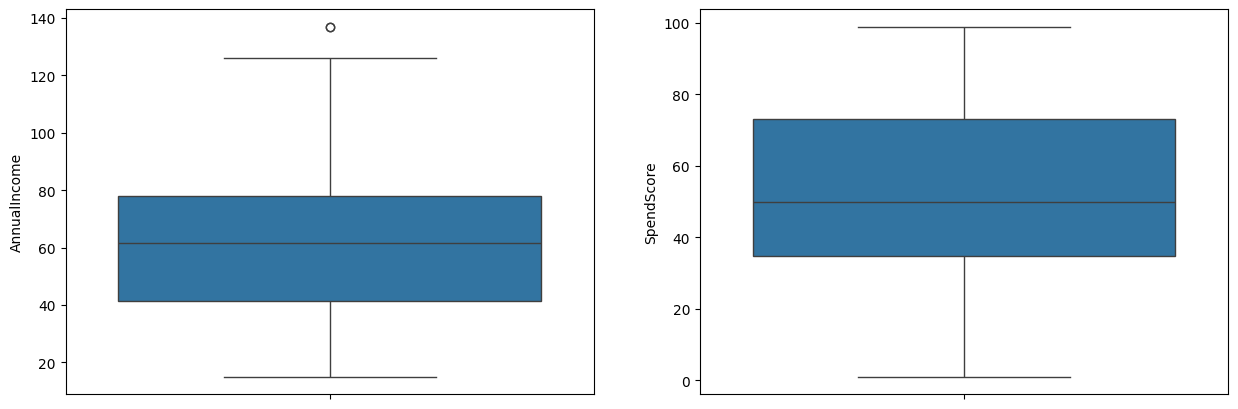

In [30]:
#checking of outliers
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.boxplot(data=df2, y="AnnualIncome")

plt.subplot(1,2,2)
sns.boxplot(data=df2, y="SpendScore")

plt.show()

***output : There is no outliers in these datasets***



**UNIVARIANT ANALYSIS**

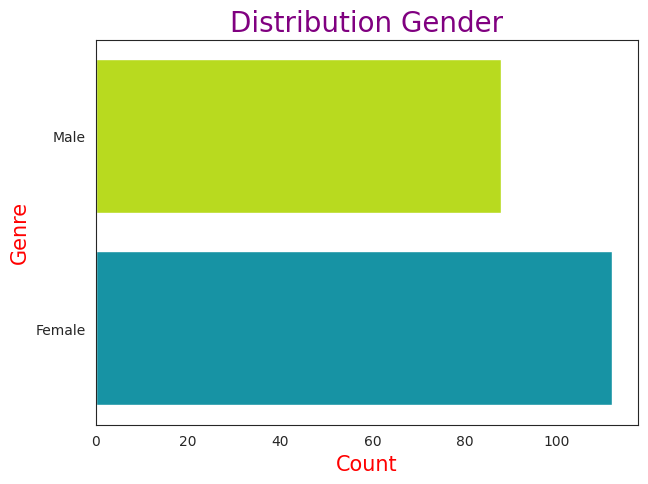

In [31]:
# checking gender distribution
plt.figure(figsize=(7,5))
sns.set_style('white')



plt.title("Distribution Gender", fontsize=20, color="purple")
plt.xlabel("Count", fontsize=15, color='red')
plt.ylabel("Genre", fontsize=15, color ='red')
sns.countplot(df2.Genre, palette="nipy_spectral_r")

plt.show()

***output : Datasets contains more Female customers compared to Male customers***

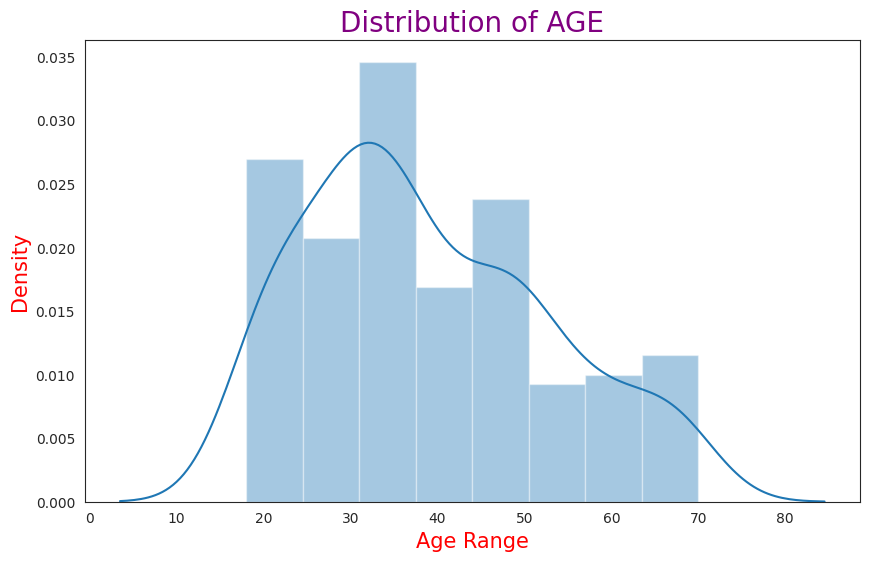

In [32]:
# Checking Age Distribution

plt.figure(figsize=(10,6))
sns.set_style('white')

sns.distplot(df2.Age)
plt.title("Distribution of AGE", fontsize=20, color="purple")
plt.xlabel("Age Range", fontsize=15, color='red')
plt.ylabel("Density", fontsize=15, color = 'red')

plt.show()

***output: Datasets contains wide range of age_group between 18 to 70***

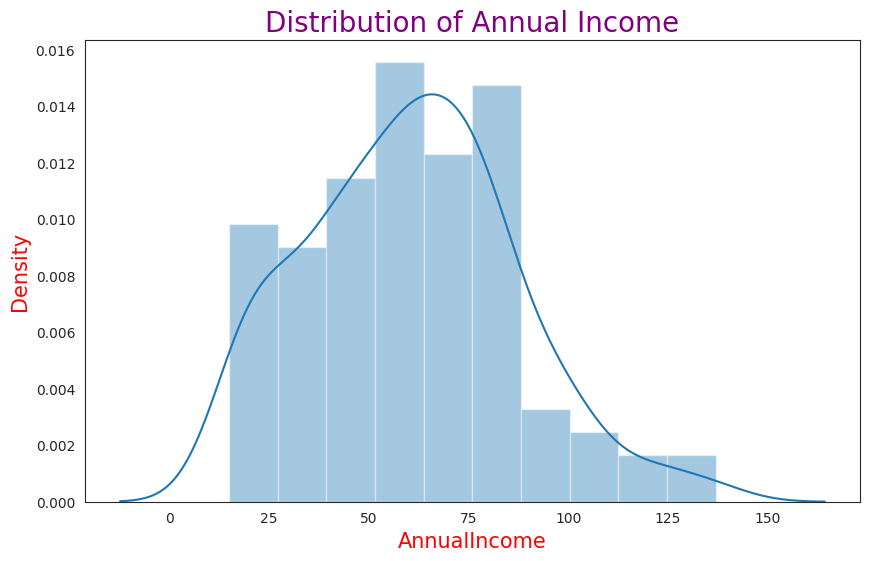

In [33]:
# Checking Annual Income Distribution

plt.figure(figsize=(10,6))
sns.set_style('white')

sns.distplot(df2["AnnualIncome"])
plt.title("Distribution of Annual Income", fontsize=20, color="purple")
plt.xlabel("AnnualIncome", fontsize=15,color='red')
plt.ylabel("Density", fontsize=15,color='red')
plt.show()

***output : Most of the people in our dataset earns 35k to 80k annual income***

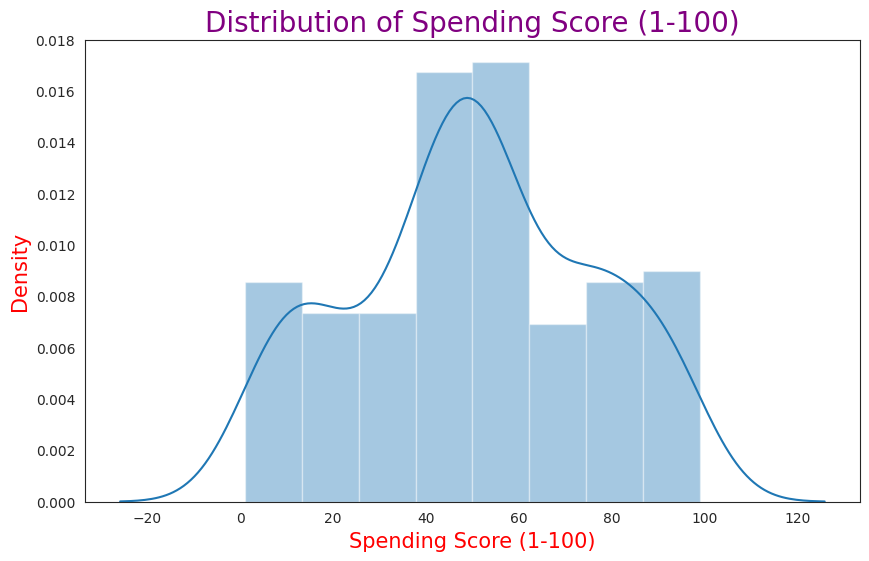

In [34]:
# Checking Spending Score (1-100) Distribution

plt.figure(figsize=(10,6))
sns.set_style('white')

sns.distplot(df2["SpendScore"])
plt.title("Distribution of Spending Score (1-100)", fontsize=20, color="purple")
plt.xlabel("Spending Score (1-100)", fontsize=15, color='red')
plt.ylabel("Density", fontsize=15, color='red')
plt.show()

***output : Most of the people have 40 - 60 as their spendscore***

**BI-VARIANT ANALYSIS**

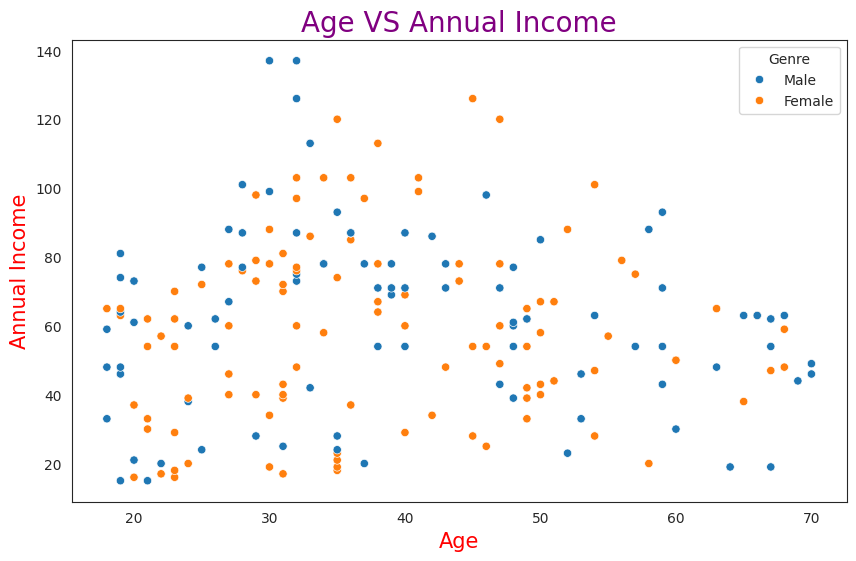

In [35]:
# Checking Age VS Annual Income using scatter plots

plt.figure(figsize=(10,6))
sns.set_style('white')

sns.scatterplot(data=df2, x="Age", y= "AnnualIncome", hue="Genre")
plt.title("Age VS Annual Income", fontsize=20, color="purple")
plt.xlabel("Age", fontsize=15, color ='red')
plt.ylabel("Annual Income", fontsize=15, color= 'red')
plt.show()

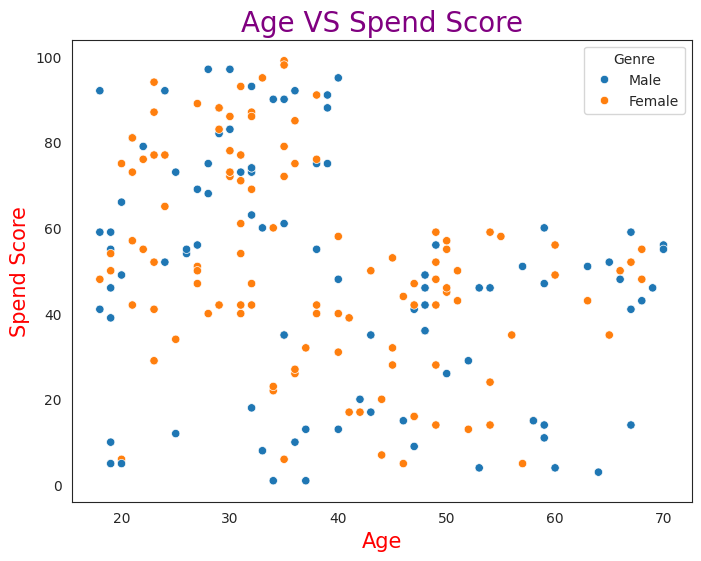

In [36]:
# Checking Age VS SpendScore using scatter plots

plt.figure(figsize=(8,6))
sns.set_style('white')

sns.scatterplot(data=df2, x="Age", y= "SpendScore", hue="Genre")
plt.title("Age VS Spend Score", fontsize=20, color="purple")
plt.xlabel("Age", fontsize=15, color ='red')
plt.ylabel("Spend Score", fontsize=15, color= 'red')
plt.show()

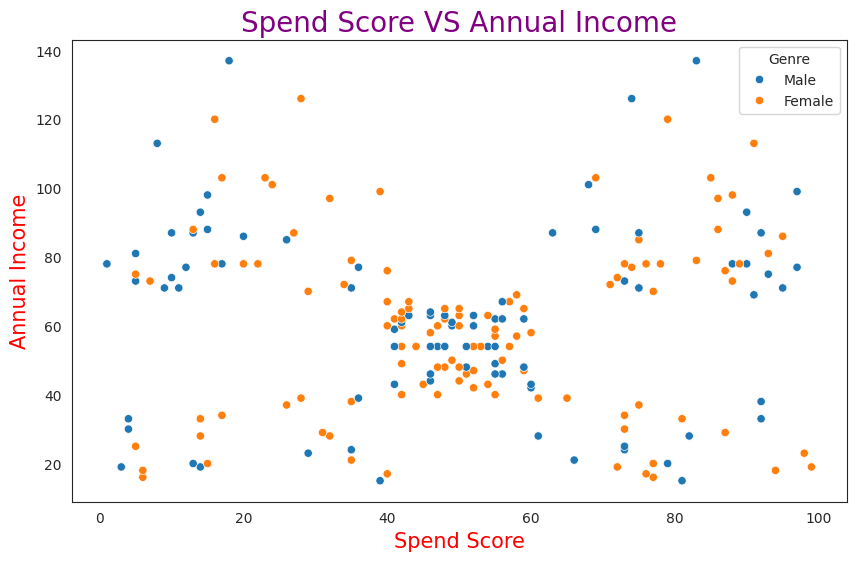

In [37]:
# Checking Spend Score VS Anual Income using scatter plots

plt.figure(figsize=(10,6))
sns.set_style('white')

sns.scatterplot(data=df2, x="SpendScore", y= "AnnualIncome", hue="Genre")
plt.title("Spend Score VS Annual Income", fontsize=20, color="purple")
plt.xlabel("Spend Score", fontsize=15, color ='red')
plt.ylabel("Annual Income", fontsize=15, color= 'red')
plt.show()

In [38]:
# Grouping based on their age categories

Age_18_25 = df2.Age[(df2.Age>=18) & (df2.Age<=25)]
Age_26_35 = df2.Age[(df2.Age>=26) & (df2.Age<=35)]
Age_36_45 = df2.Age[(df2.Age>=36) & (df2.Age<=45)]
Age_46_55 = df2.Age[(df2.Age>=46) & (df2.Age<=55)]
Age_55_Above = df2.Age[(df2.Age>=56)]

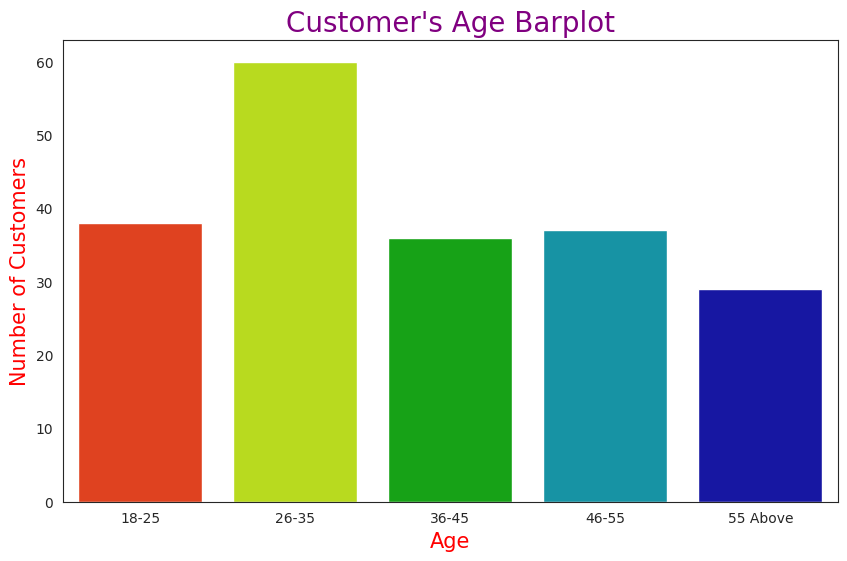

In [39]:
#checking the age_group of customers and their counts
x = ["18-25","26-35","36-45","46-55","55 Above"]
y = [len(Age_18_25.values),len(Age_26_35.values),len(Age_36_45.values),len(Age_46_55.values),len(Age_55_Above.values)]

plt.figure(figsize=(10,6))
sns.barplot(x=x, y=y, palette="nipy_spectral_r")
plt.title("Customer's Age Barplot", fontsize=20, color="purple")
plt.xlabel("Age", fontsize=15, color = 'red')
plt.ylabel("Number of Customers", fontsize=15, color = 'red')
plt.show()

***output : Age group between 26-35 have more than 50+ customers***

In [40]:
# grouping based on their spend scores

ss1_20 = df2["SpendScore"][(df2["SpendScore"] >= 1) & (df2["SpendScore"] <= 20)]
ss21_40 = df2["SpendScore"][(df2["SpendScore"] >= 21) & (df2["SpendScore"] <= 40)]
ss41_60 = df2["SpendScore"][(df2["SpendScore"] >= 41) & (df2["SpendScore"] <= 60)]
ss61_80 = df2["SpendScore"][(df2["SpendScore"] >= 61) & (df2["SpendScore"] <= 80)]
ss81_100 = df2["SpendScore"][(df2["SpendScore"] >= 81) & (df2["SpendScore"] <= 100)]

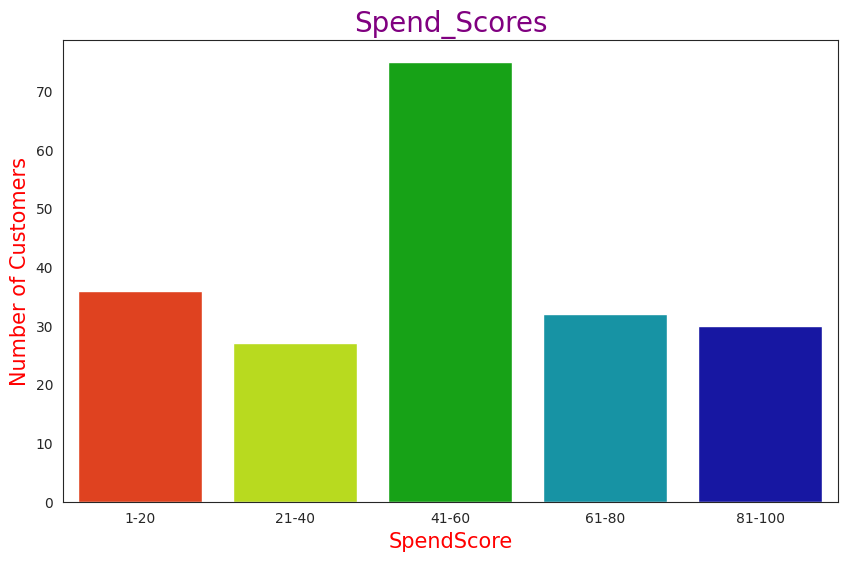

In [41]:
#checking the spend scores values and their counts
ss_x= ['1-20','21-40','41-60','61-80','81-100']
ss_y = [len(ss1_20.values), len(ss21_40.values), len(ss41_60.values), len(ss61_80.values), len(ss81_100.values)]

plt.figure(figsize=(10,6))
sns.barplot(x=ss_x, y=ss_y,palette="nipy_spectral_r")
plt.title("Spend_Scores", fontsize=20, color="purple")
plt.xlabel("SpendScore", fontsize=15, color='red')
plt.ylabel("Number of Customers", fontsize=15,color='red')
plt.show()

***output : 70+ customers have spendscore range between 41-60***

In [42]:
# grouping based on their annual income
annual_income_0_30 = df2["AnnualIncome"][(df2["AnnualIncome"] >= 0) & (df2["AnnualIncome"] <= 30)]
annual_income_31_60 = df2["AnnualIncome"][(df2["AnnualIncome"] >= 31) & (df2["AnnualIncome"] <= 60)]
annual_income_61_90 = df2["AnnualIncome"][(df2["AnnualIncome"] >= 61) & (df2["AnnualIncome"] <= 90)]
annual_income_91_120 = df2["AnnualIncome"][(df2["AnnualIncome"] >= 91) & (df2["AnnualIncome"] <= 120)]
annual_income_121_150 = df2["AnnualIncome"][(df2["AnnualIncome"] >= 121) & (df2["AnnualIncome"] <= 150)]

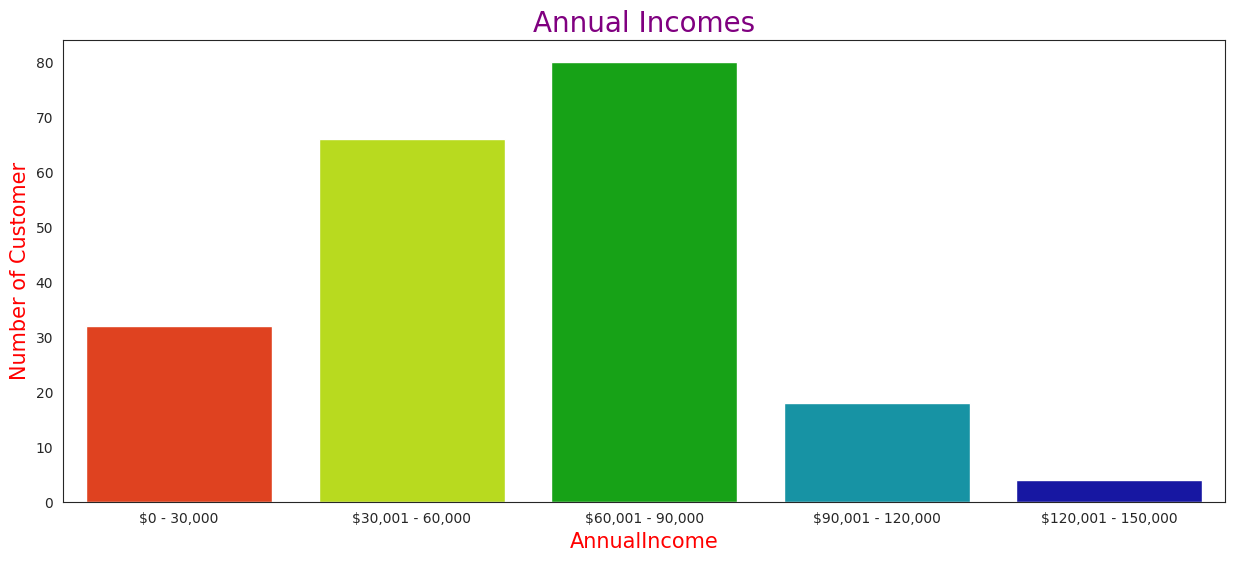

In [43]:
#checking the annual_income values and their counts
income_x = ["$0 - 30,000", "$30,001 - 60,000", "$60,001 - 90,000", "$90,001 - 120,000", "$120,001 - 150,000"]
income_y = [len(annual_income_0_30.values), len(annual_income_31_60.values), len(annual_income_61_90.values), len(annual_income_91_120.values), len(annual_income_121_150.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=income_x, y=income_y, palette="nipy_spectral_r")
plt.title("Annual Incomes", fontsize=20, color="purple")
plt.xlabel("AnnualIncome", fontsize=15, color='red')
plt.ylabel("Number of Customer", fontsize=15, color='red')
plt.show()

***output: 70+ customers earns $60,000 to 90,000 as their annual_income ***

In [44]:
#importing the libraries
from pyspark.sql import SparkSession
from pyspark.sql import functions as F

In [45]:
# grouping based on age_group using sql query
df_mall_customers=df.withColumn("Age_Group",F.when(df.Age <= "24","18-24")
                                 .when((df.Age >= "25") & (df.Age <= "32"),"25-32")
                                 .when((df.Age >= "33") & (df.Age <= "40"),"33-40")
                                 .when((df.Age >= "41") & (df.Age <= "48"),"41-48")
                                 .when((df.Age >= "49") & (df.Age <= "56"),"49-56")
                                 .otherwise("Above 56"))

In [46]:
#adding to the seperate coloumns
df_mall_customers.show()

+---+------+---+------------+----------+---------+
| Id| Genre|Age|AnnualIncome|SpendScore|Age_Group|
+---+------+---+------------+----------+---------+
|  1|  Male| 19|          15|        39|    18-24|
|  2|  Male| 21|          15|        81|    18-24|
|  3|Female| 20|          16|         6|    18-24|
|  4|Female| 23|          16|        77|    18-24|
|  5|Female| 31|          17|        40|    25-32|
|  6|Female| 22|          17|        76|    18-24|
|  7|Female| 35|          18|         6|    33-40|
|  8|Female| 23|          18|        94|    18-24|
|  9|  Male| 64|          19|         3| Above 56|
| 10|Female| 30|          19|        72|    25-32|
| 11|  Male| 67|          19|        14| Above 56|
| 12|Female| 35|          19|        99|    33-40|
| 13|Female| 58|          20|        15| Above 56|
| 14|Female| 24|          20|        77|    18-24|
| 15|  Male| 37|          20|        13|    33-40|
| 16|  Male| 22|          20|        79|    18-24|
| 17|Female| 35|          21|  

In [47]:
#grouping age_group with the summation of annual income and spend score
df_mall_customers_group=df_mall_customers.groupby('Age_Group').sum('AnnualIncome','SpendScore').orderBy('Age_Group')

In [48]:
df_mall_customers_group.show()

+---------+-----------------+---------------+
|Age_Group|sum(AnnualIncome)|sum(SpendScore)|
+---------+-----------------+---------------+
|    18-24|             1563|           1969|
|    25-32|             3206|           3052|
|    33-40|             2772|           2213|
|    41-48|             1767|            779|
|    49-56|             1326|            949|
| Above 56|             1478|           1078|
+---------+-----------------+---------------+



In [49]:
#changing the dataframe into pandas
df_pandas_age_group=df_mall_customers_group.toPandas()

In [50]:

df_pandas_age_group.head()

,Age_Group,sum(AnnualIncome),sum(SpendScore)
0,18-24,1563,1969
1,25-32,3206,3052
2,33-40,2772,2213
3,41-48,1767,779
4,49-56,1326,949


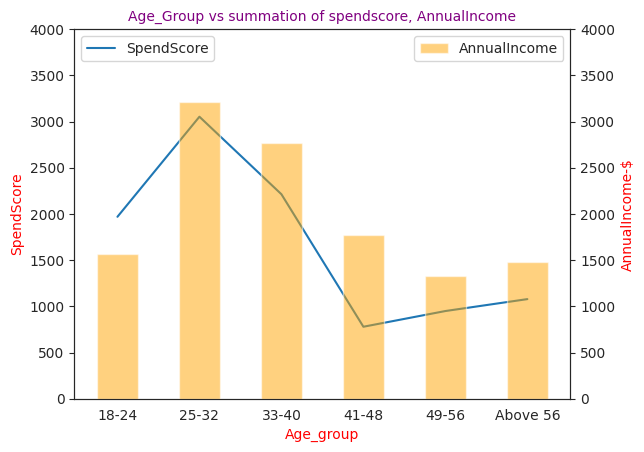

In [51]:
# Checking the distribution based on age_group with spend score,annual income
fig, ax1 = plt.subplots()

# plot line chart on axis #1
ax1.plot(df_pandas_age_group["Age_Group"],df_pandas_age_group["sum(SpendScore)"])
ax1.set_xlabel('Age_group',fontsize=10,color='red')
ax1.set_ylabel('SpendScore', fontsize=10, color='red')
ax1.set_ylim(0, 4000)
ax1.legend(['SpendScore'], loc="upper left")

# set up the 2nd axis
ax2 = ax1.twinx()

# plot bar chart on axis #2
ax2.bar(df_pandas_age_group["Age_Group"],df_pandas_age_group["sum(AnnualIncome)"], width=0.5, alpha=0.5, color='orange')
ax2.grid(False) # turn off grid #2
ax2.set_ylabel('AnnualIncome-$',fontsize=10,color='red')
ax2.set_ylim(0, 4000)
ax2.legend(['AnnualIncome'], loc="upper right")

plt.title("Age_Group vs summation of spendscore, AnnualIncome", fontsize=10, color="purple")
plt.show()

***output:***
1.   ***Age_group between 18-24 have spend more money than their annual_income***
2.   ***Age_group >40 have spend less money than their annual_income***





In [52]:
# filtering female customers
df_mall_customers_female=df_mall_customers.filter(df_mall_customers.Genre=="Female")

In [53]:
df_mall_customers_female.describe().show()

+-------+-----------------+------+------------------+------------------+------------------+---------+
|summary|               Id| Genre|               Age|      AnnualIncome|        SpendScore|Age_Group|
+-------+-----------------+------+------------------+------------------+------------------+---------+
|  count|              112|   112|               112|               112|               112|      112|
|   mean|          97.5625|  NULL|38.098214285714285|             59.25|51.526785714285715|     NULL|
| stddev|58.27641206099346|  NULL|12.644095457392353|26.011951515055948|24.114949877478647|     NULL|
|    min|                3|Female|                18|                16|                 5|    18-24|
|    max|              197|Female|                68|               126|                99| Above 56|
+-------+-----------------+------+------------------+------------------+------------------+---------+



In [54]:
#Grouping of female customers based on their age group
df_mall_customers_female_age_grp=df_mall_customers_female.groupby('Age_Group').sum('AnnualIncome','SpendScore').orderBy('Age_Group')

In [55]:
df_mall_customers_female_age_grp.describe().show()

+-------+---------+------------------+-----------------+
|summary|Age_Group| sum(AnnualIncome)|  sum(SpendScore)|
+-------+---------+------------------+-----------------+
|  count|        6|                 6|                6|
|   mean|     NULL|            1106.0|961.8333333333334|
| stddev|     NULL|459.72600535536384|546.7377494436128|
|    min|    18-24|               515|              408|
|    max| Above 56|              1782|             1837|
+-------+---------+------------------+-----------------+



In [56]:
df_mall_customers_female_age_grp.show()

+---------+-----------------+---------------+
|Age_Group|sum(AnnualIncome)|sum(SpendScore)|
+---------+-----------------+---------------+
|    18-24|              807|           1139|
|    25-32|             1782|           1837|
|    33-40|             1489|           1212|
|    41-48|             1029|            433|
|    49-56|             1014|            742|
| Above 56|              515|            408|
+---------+-----------------+---------------+



In [57]:
#filtering male customers
df_mall_customers_male=df_mall_customers.filter(df_mall_customers.Genre=="Male")

In [58]:
df_mall_customers_male.show(5)

+---+-----+---+------------+----------+---------+
| Id|Genre|Age|AnnualIncome|SpendScore|Age_Group|
+---+-----+---+------------+----------+---------+
|  1| Male| 19|          15|        39|    18-24|
|  2| Male| 21|          15|        81|    18-24|
|  9| Male| 64|          19|         3| Above 56|
| 11| Male| 67|          19|        14| Above 56|
| 15| Male| 37|          20|        13|    33-40|
+---+-----+---+------------+----------+---------+
only showing top 5 rows



In [59]:
#Grouping of male customers based on their age group
df_mall_customers_male_age_grp=df_mall_customers_male.groupby('Age_Group').sum('AnnualIncome','SpendScore').orderBy('Age_Group')

In [60]:
df_mall_customers_male_age_grp.show()

+---------+-----------------+---------------+
|Age_Group|sum(AnnualIncome)|sum(SpendScore)|
+---------+-----------------+---------------+
|    18-24|              756|            830|
|    25-32|             1424|           1215|
|    33-40|             1283|           1001|
|    41-48|              738|            346|
|    49-56|              312|            207|
| Above 56|              963|            670|
+---------+-----------------+---------------+



In [61]:
#converting dataframe into pandas
df_pandas_male_age_grp=df_mall_customers_male_age_grp.toPandas()
df_pandas_female_age_grp=df_mall_customers_female_age_grp.toPandas()

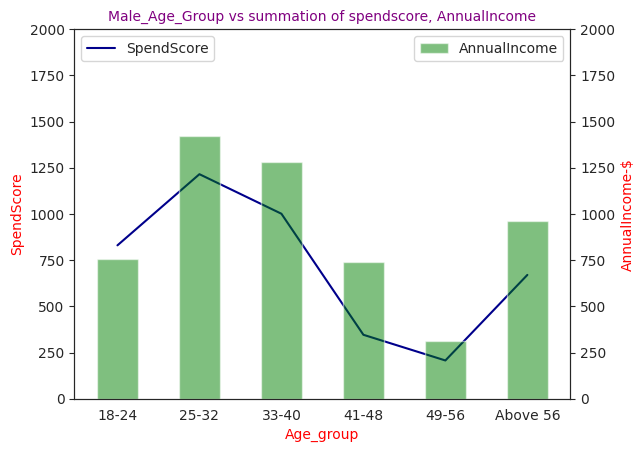

In [62]:
#Checking the distribution based on male_age_group with spend score,annual income

fig, ax1 = plt.subplots()

# plot line chart on axis #1
ax1.plot(df_pandas_male_age_grp["Age_Group"],df_pandas_male_age_grp["sum(SpendScore)"],color='darkblue')
ax1.set_xlabel('Age_group',fontsize=10, color='red')
ax1.set_ylabel('SpendScore',fontsize=10, color='red')
ax1.set_ylim(0, 2000)
ax1.legend(['SpendScore'], loc="upper left")

# set up the 2nd axis
ax2 = ax1.twinx()

# plot bar chart on axis #2
ax2.bar(df_pandas_male_age_grp["Age_Group"],df_pandas_male_age_grp["sum(AnnualIncome)"], width=0.5, alpha=0.5, color='green')
ax2.grid(False) # turn off grid #2
ax2.set_ylabel('AnnualIncome-$',fontsize=10, color='red')
ax2.set_ylim(0, 2000)
ax2.legend(['AnnualIncome'], loc="upper right")

plt.title("Male_Age_Group vs summation of spendscore, AnnualIncome", fontsize=10, color="purple")
plt.show()

***output: wide range of male customers spends less money from their annual_income***

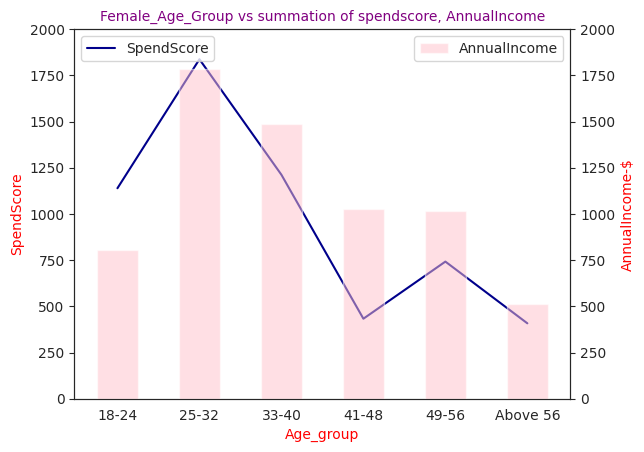

In [63]:
#Checking the distribution based on female_age_group with spend score,annual income

fig, ax1 = plt.subplots()

# plot line chart on axis #1
ax1.plot(df_pandas_female_age_grp["Age_Group"],df_pandas_female_age_grp["sum(SpendScore)"],color='darkblue')
ax1.set_xlabel('Age_group',fontsize=10,color='red')
ax1.set_ylabel('SpendScore',fontsize=10,color='red')
ax1.set_ylim(0, 2000)
ax1.legend(['SpendScore'], loc="upper left")

# set up the 2nd axis
ax2 = ax1.twinx()

# plot bar chart on axis #2
ax2.bar(df_pandas_female_age_grp["Age_Group"],df_pandas_female_age_grp["sum(AnnualIncome)"], width=0.5, alpha=0.5, color='pink')
ax2.grid(False) # turn off grid #2
ax2.set_ylabel('AnnualIncome-$',fontsize=10,color='red')
ax2.set_ylim(0, 2000)
ax2.legend(['AnnualIncome'], loc="upper right")


plt.title("Female_Age_Group vs summation of spendscore, AnnualIncome", fontsize=10, color="purple")
plt.show()

***output: Female customers from 18-32 age_group spends more money than their annual_income***

**MODEL BUILDING**

In [64]:
# listing the columns
df.columns

['Id', 'Genre', 'Age', 'AnnualIncome', 'SpendScore']

In [65]:
ss=SparkSession.builder.appName('classification').getOrCreate()

In [66]:
df.printSchema()

root
 |-- Id: integer (nullable = true)
 |-- Genre: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- AnnualIncome: integer (nullable = true)
 |-- SpendScore: integer (nullable = true)



In [67]:
# dropping the gender column

df1 =df.drop('Genre')
df1.show()

+---+---+------------+----------+
| Id|Age|AnnualIncome|SpendScore|
+---+---+------------+----------+
|  1| 19|          15|        39|
|  2| 21|          15|        81|
|  3| 20|          16|         6|
|  4| 23|          16|        77|
|  5| 31|          17|        40|
|  6| 22|          17|        76|
|  7| 35|          18|         6|
|  8| 23|          18|        94|
|  9| 64|          19|         3|
| 10| 30|          19|        72|
| 11| 67|          19|        14|
| 12| 35|          19|        99|
| 13| 58|          20|        15|
| 14| 24|          20|        77|
| 15| 37|          20|        13|
| 16| 22|          20|        79|
| 17| 35|          21|        35|
| 18| 20|          21|        66|
| 19| 52|          23|        29|
| 20| 35|          23|        98|
+---+---+------------+----------+
only showing top 20 rows



**MODEL BUILDING - LINEAR REGRESSION ALGORITHUM**

In [68]:
### pyspark using linear regression

In [69]:
# importing the required library
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import VectorAssembler

In [70]:
Assembler=VectorAssembler(inputCols=[ 'Age', 'AnnualIncome', 'SpendScore'],outputCol='features')

In [71]:
# tranform into vector form
df1=Assembler.transform(df1)

In [72]:
df1.show()

+---+---+------------+----------+----------------+
| Id|Age|AnnualIncome|SpendScore|        features|
+---+---+------------+----------+----------------+
|  1| 19|          15|        39|[19.0,15.0,39.0]|
|  2| 21|          15|        81|[21.0,15.0,81.0]|
|  3| 20|          16|         6| [20.0,16.0,6.0]|
|  4| 23|          16|        77|[23.0,16.0,77.0]|
|  5| 31|          17|        40|[31.0,17.0,40.0]|
|  6| 22|          17|        76|[22.0,17.0,76.0]|
|  7| 35|          18|         6| [35.0,18.0,6.0]|
|  8| 23|          18|        94|[23.0,18.0,94.0]|
|  9| 64|          19|         3| [64.0,19.0,3.0]|
| 10| 30|          19|        72|[30.0,19.0,72.0]|
| 11| 67|          19|        14|[67.0,19.0,14.0]|
| 12| 35|          19|        99|[35.0,19.0,99.0]|
| 13| 58|          20|        15|[58.0,20.0,15.0]|
| 14| 24|          20|        77|[24.0,20.0,77.0]|
| 15| 37|          20|        13|[37.0,20.0,13.0]|
| 16| 22|          20|        79|[22.0,20.0,79.0]|
| 17| 35|          21|        3

In [73]:
df1.select(['features','SpendScore']).show()

+----------------+----------+
|        features|SpendScore|
+----------------+----------+
|[19.0,15.0,39.0]|        39|
|[21.0,15.0,81.0]|        81|
| [20.0,16.0,6.0]|         6|
|[23.0,16.0,77.0]|        77|
|[31.0,17.0,40.0]|        40|
|[22.0,17.0,76.0]|        76|
| [35.0,18.0,6.0]|         6|
|[23.0,18.0,94.0]|        94|
| [64.0,19.0,3.0]|         3|
|[30.0,19.0,72.0]|        72|
|[67.0,19.0,14.0]|        14|
|[35.0,19.0,99.0]|        99|
|[58.0,20.0,15.0]|        15|
|[24.0,20.0,77.0]|        77|
|[37.0,20.0,13.0]|        13|
|[22.0,20.0,79.0]|        79|
|[35.0,21.0,35.0]|        35|
|[20.0,21.0,66.0]|        66|
|[52.0,23.0,29.0]|        29|
|[35.0,23.0,98.0]|        98|
+----------------+----------+
only showing top 20 rows



In [74]:
lr=LinearRegression(featuresCol='features',labelCol='SpendScore')

In [75]:
lr

LinearRegression_2f483e827b40

In [76]:
lr_model=lr.fit(df1)

In [77]:
lr_model.summary.rootMeanSquaredError

7.98599249812914e-15

In [78]:
# splitting the values training 70%, testing 30%
splits=df1.randomSplit([0.7,0.3])

In [79]:
train_df1=splits[0]

In [80]:
train_df1.show()

+---+---+------------+----------+----------------+
| Id|Age|AnnualIncome|SpendScore|        features|
+---+---+------------+----------+----------------+
|  1| 19|          15|        39|[19.0,15.0,39.0]|
|  2| 21|          15|        81|[21.0,15.0,81.0]|
|  3| 20|          16|         6| [20.0,16.0,6.0]|
|  4| 23|          16|        77|[23.0,16.0,77.0]|
|  5| 31|          17|        40|[31.0,17.0,40.0]|
|  6| 22|          17|        76|[22.0,17.0,76.0]|
|  8| 23|          18|        94|[23.0,18.0,94.0]|
|  9| 64|          19|         3| [64.0,19.0,3.0]|
| 10| 30|          19|        72|[30.0,19.0,72.0]|
| 12| 35|          19|        99|[35.0,19.0,99.0]|
| 13| 58|          20|        15|[58.0,20.0,15.0]|
| 14| 24|          20|        77|[24.0,20.0,77.0]|
| 15| 37|          20|        13|[37.0,20.0,13.0]|
| 16| 22|          20|        79|[22.0,20.0,79.0]|
| 17| 35|          21|        35|[35.0,21.0,35.0]|
| 19| 52|          23|        29|[52.0,23.0,29.0]|
| 20| 35|          23|        9

In [81]:
test_df1=splits[1]

In [82]:
test_df1.show()

+---+---+------------+----------+----------------+
| Id|Age|AnnualIncome|SpendScore|        features|
+---+---+------------+----------+----------------+
|  7| 35|          18|         6| [35.0,18.0,6.0]|
| 11| 67|          19|        14|[67.0,19.0,14.0]|
| 18| 20|          21|        66|[20.0,21.0,66.0]|
| 21| 35|          24|        35|[35.0,24.0,35.0]|
| 22| 25|          24|        73|[25.0,24.0,73.0]|
| 27| 45|          28|        32|[45.0,28.0,32.0]|
| 31| 60|          30|         4| [60.0,30.0,4.0]|
| 32| 21|          30|        73|[21.0,30.0,73.0]|
| 33| 53|          33|         4| [53.0,33.0,4.0]|
| 38| 30|          34|        73|[30.0,34.0,73.0]|
| 44| 31|          39|        61|[31.0,39.0,61.0]|
| 56| 47|          43|        41|[47.0,43.0,41.0]|
| 61| 70|          46|        56|[70.0,46.0,56.0]|
| 74| 60|          50|        56|[60.0,50.0,56.0]|
| 76| 26|          54|        54|[26.0,54.0,54.0]|
| 79| 23|          54|        52|[23.0,54.0,52.0]|
| 83| 67|          54|        4

In [83]:
lr1=LinearRegression(featuresCol='features',labelCol='SpendScore')

In [84]:
lr1_model=lr1.fit(train_df1)

In [85]:
# predicting the values
pred=lr1_model.transform(test_df1)

In [86]:
pred.show()

+---+---+------------+----------+----------------+----------+
| Id|Age|AnnualIncome|SpendScore|        features|prediction|
+---+---+------------+----------+----------------+----------+
|  7| 35|          18|         6| [35.0,18.0,6.0]|       6.0|
| 11| 67|          19|        14|[67.0,19.0,14.0]|      14.0|
| 18| 20|          21|        66|[20.0,21.0,66.0]|      66.0|
| 21| 35|          24|        35|[35.0,24.0,35.0]|      35.0|
| 22| 25|          24|        73|[25.0,24.0,73.0]|      73.0|
| 27| 45|          28|        32|[45.0,28.0,32.0]|      32.0|
| 31| 60|          30|         4| [60.0,30.0,4.0]|       4.0|
| 32| 21|          30|        73|[21.0,30.0,73.0]|      73.0|
| 33| 53|          33|         4| [53.0,33.0,4.0]|       4.0|
| 38| 30|          34|        73|[30.0,34.0,73.0]|      73.0|
| 44| 31|          39|        61|[31.0,39.0,61.0]|      61.0|
| 56| 47|          43|        41|[47.0,43.0,41.0]|      41.0|
| 61| 70|          46|        56|[70.0,46.0,56.0]|      56.0|
| 74| 60

In [87]:
pred.select(['prediction','SpendScore','features']).show()

+----------+----------+----------------+
|prediction|SpendScore|        features|
+----------+----------+----------------+
|       6.0|         6| [35.0,18.0,6.0]|
|      14.0|        14|[67.0,19.0,14.0]|
|      66.0|        66|[20.0,21.0,66.0]|
|      35.0|        35|[35.0,24.0,35.0]|
|      73.0|        73|[25.0,24.0,73.0]|
|      32.0|        32|[45.0,28.0,32.0]|
|       4.0|         4| [60.0,30.0,4.0]|
|      73.0|        73|[21.0,30.0,73.0]|
|       4.0|         4| [53.0,33.0,4.0]|
|      73.0|        73|[30.0,34.0,73.0]|
|      61.0|        61|[31.0,39.0,61.0]|
|      41.0|        41|[47.0,43.0,41.0]|
|      56.0|        56|[70.0,46.0,56.0]|
|      56.0|        56|[60.0,50.0,56.0]|
|      54.0|        54|[26.0,54.0,54.0]|
|      52.0|        52|[23.0,54.0,52.0]|
|      41.0|        41|[67.0,54.0,41.0]|
|      57.0|        57|[21.0,54.0,57.0]|
|      46.0|        46|[48.0,54.0,46.0]|
|      55.0|        55|[22.0,57.0,55.0]|
+----------+----------+----------------+
only showing top

**MODEL BUILDING - DECISION TREE ALGORITHUM**

In [88]:
### pyspark using decision tree

In [89]:
from pyspark.ml.regression import DecisionTreeRegressor

In [90]:
dt=DecisionTreeRegressor(featuresCol='features',labelCol='SpendScore')

In [91]:
dt_model=dt.fit(train_df1)

In [92]:
pred2=dt_model.transform(test_df1)

In [93]:
pred2.show()

+---+---+------------+----------+----------------+-----------------+
| Id|Age|AnnualIncome|SpendScore|        features|       prediction|
+---+---+------------+----------+----------------+-----------------+
|  7| 35|          18|         6| [35.0,18.0,6.0]|              7.5|
| 11| 67|          19|        14|[67.0,19.0,14.0]|           13.375|
| 18| 20|          21|        66|[20.0,21.0,66.0]|             65.0|
| 21| 35|          24|        35|[35.0,24.0,35.0]|             35.0|
| 22| 25|          24|        73|[25.0,24.0,73.0]|73.66666666666667|
| 27| 45|          28|        32|[45.0,28.0,32.0]|            30.25|
| 31| 60|          30|         4| [60.0,30.0,4.0]|              3.0|
| 32| 21|          30|        73|[21.0,30.0,73.0]|73.66666666666667|
| 33| 53|          33|         4| [53.0,33.0,4.0]|              3.0|
| 38| 30|          34|        73|[30.0,34.0,73.0]|73.66666666666667|
| 44| 31|          39|        61|[31.0,39.0,61.0]|             61.0|
| 56| 47|          43|        41|[

**MODEL BUILDING - KMEANS ALGORITHUM**

In [94]:
#pyspark using kmeans algorithum
# Modeling + Evaluation
from pyspark.ml.feature import VectorAssembler, VectorIndexer, OneHotEncoder, StringIndexer
from pyspark.sql.functions import when
from pyspark.sql import functions as F
from pyspark.sql.functions import avg
from pyspark.ml import Pipeline
from pyspark.ml.clustering import KMeans
from pyspark.ml.feature import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

In [95]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator

In [96]:
#Create model KMeans
k = 5
kmeans2 = KMeans().setK(k).setSeed(1).setFeaturesCol("features")
model_k5 = kmeans2.fit(df1)
centers2 = model_k5.clusterCenters()

print("Cluster Centers: ")
for center in centers2:
    print(center)

Cluster Centers: 
[24.96 28.04 77.  ]
[45.2173913  26.30434783 20.91304348]
[40.32432432 87.43243243 18.18918919]
[32.69230769 86.53846154 82.12820513]
[43.93421053 55.21052632 49.44736842]


In [97]:
#Assign cluster to the event in data
prediction2= model_k5.transform(df1).select('ID','Age','AnnualIncome','SpendScore','prediction').collect()

#create dataframe
prediction2=spark.createDataFrame(prediction2)

In [98]:
#show dataframe
prediction2.show()

+---+---+------------+----------+----------+
| ID|Age|AnnualIncome|SpendScore|prediction|
+---+---+------------+----------+----------+
|  1| 19|          15|        39|         1|
|  2| 21|          15|        81|         0|
|  3| 20|          16|         6|         1|
|  4| 23|          16|        77|         0|
|  5| 31|          17|        40|         1|
|  6| 22|          17|        76|         0|
|  7| 35|          18|         6|         1|
|  8| 23|          18|        94|         0|
|  9| 64|          19|         3|         1|
| 10| 30|          19|        72|         0|
| 11| 67|          19|        14|         1|
| 12| 35|          19|        99|         0|
| 13| 58|          20|        15|         1|
| 14| 24|          20|        77|         0|
| 15| 37|          20|        13|         1|
| 16| 22|          20|        79|         0|
| 17| 35|          21|        35|         1|
| 18| 20|          21|        66|         0|
| 19| 52|          23|        29|         1|
| 20| 35| 

In [99]:
#grouping by cluster prediction
prediction2.groupBy('prediction').count().show()

+----------+-----+
|prediction|count|
+----------+-----+
|         0|   25|
|         1|   23|
|         3|   39|
|         2|   37|
|         4|   76|
+----------+-----+



In [100]:
#Join
prediction3=prediction2.join(df1, 'Id')
prediction3.show()

+---+---+------------+----------+----------+---+------------+----------+----------------+
| ID|Age|AnnualIncome|SpendScore|prediction|Age|AnnualIncome|SpendScore|        features|
+---+---+------------+----------+----------+---+------------+----------+----------------+
|  1| 19|          15|        39|         1| 19|          15|        39|[19.0,15.0,39.0]|
|  2| 21|          15|        81|         0| 21|          15|        81|[21.0,15.0,81.0]|
|  3| 20|          16|         6|         1| 20|          16|         6| [20.0,16.0,6.0]|
|  4| 23|          16|        77|         0| 23|          16|        77|[23.0,16.0,77.0]|
|  5| 31|          17|        40|         1| 31|          17|        40|[31.0,17.0,40.0]|
|  6| 22|          17|        76|         0| 22|          17|        76|[22.0,17.0,76.0]|
|  7| 35|          18|         6|         1| 35|          18|         6| [35.0,18.0,6.0]|
|  8| 23|          18|        94|         0| 23|          18|        94|[23.0,18.0,94.0]|
|  9| 64| 

In [101]:
df1.show()

+---+---+------------+----------+----------------+
| Id|Age|AnnualIncome|SpendScore|        features|
+---+---+------------+----------+----------------+
|  1| 19|          15|        39|[19.0,15.0,39.0]|
|  2| 21|          15|        81|[21.0,15.0,81.0]|
|  3| 20|          16|         6| [20.0,16.0,6.0]|
|  4| 23|          16|        77|[23.0,16.0,77.0]|
|  5| 31|          17|        40|[31.0,17.0,40.0]|
|  6| 22|          17|        76|[22.0,17.0,76.0]|
|  7| 35|          18|         6| [35.0,18.0,6.0]|
|  8| 23|          18|        94|[23.0,18.0,94.0]|
|  9| 64|          19|         3| [64.0,19.0,3.0]|
| 10| 30|          19|        72|[30.0,19.0,72.0]|
| 11| 67|          19|        14|[67.0,19.0,14.0]|
| 12| 35|          19|        99|[35.0,19.0,99.0]|
| 13| 58|          20|        15|[58.0,20.0,15.0]|
| 14| 24|          20|        77|[24.0,20.0,77.0]|
| 15| 37|          20|        13|[37.0,20.0,13.0]|
| 16| 22|          20|        79|[22.0,20.0,79.0]|
| 17| 35|          21|        3

In [102]:
#grouping by cluster prediction and check average of age
prediction2.groupBy('prediction').agg({'Age':'mean'}).show()

+----------+-----------------+
|prediction|         avg(Age)|
+----------+-----------------+
|         0|            24.96|
|         1|45.21739130434783|
|         3|32.69230769230769|
|         2|40.32432432432432|
|         4|43.93421052631579|
+----------+-----------------+



In [103]:
#grouping by cluster prediction and check average of all numerical variable
prediction2.groupBy('prediction').avg().show()

+----------+------------------+-----------------+------------------+-----------------+---------------+
|prediction|           avg(ID)|         avg(Age)| avg(AnnualIncome)|  avg(SpendScore)|avg(prediction)|
+----------+------------------+-----------------+------------------+-----------------+---------------+
|         0|             27.48|            24.96|             28.04|             77.0|            0.0|
|         1|              23.0|45.21739130434783|26.304347826086957|20.91304347826087|            1.0|
|         3|             162.0|32.69230769230769| 86.53846153846153|82.12820512820512|            3.0|
|         2|162.94594594594594|40.32432432432432| 87.43243243243244|18.18918918918919|            2.0|
|         4| 86.01315789473684|43.93421052631579| 55.21052631578947|49.44736842105263|            4.0|
+----------+------------------+-----------------+------------------+-----------------+---------------+



In [104]:
#convert prediction to Pandas
pred =prediction2.toPandas().set_index('ID')

In [105]:
#show pandas dataframe
pred.head()

,Age,AnnualIncome,SpendScore,prediction
ID,,,,
1,19,15,39,1
2,21,15,81,0
3,20,16,6,1
4,23,16,77,0
5,31,17,40,1


In [106]:
from mpl_toolkits.mplot3d import Axes3D

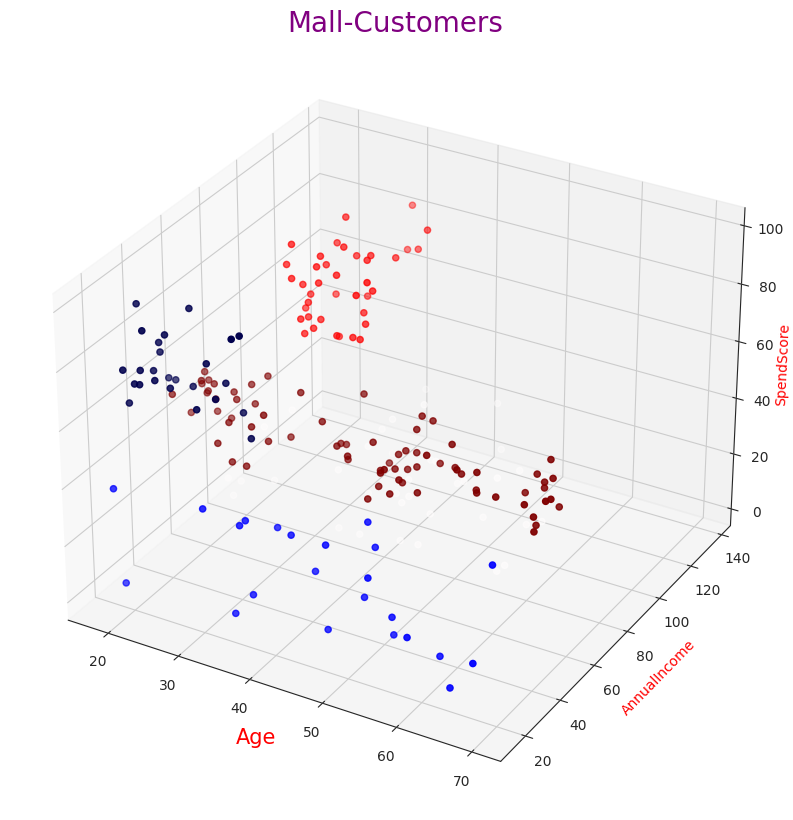

In [107]:
#Create 3d visualization
threedee = plt.figure(figsize=(12,10))
threedee = threedee.add_subplot(projection='3d')
threedee.scatter(pred.Age, pred.AnnualIncome, pred.SpendScore, c=pred.prediction, cmap="seismic")
threedee.set_title('Mall-Customers',fontsize=20, color='purple')
threedee.set_xlabel('Age',fontsize=15, color='red')
threedee.set_ylabel('AnnualIncome', fontsize=10, color='red')
threedee.set_zlabel('SpendScore', rotation=90, fontsize=10, color='red')
threedee.zaxis.labelpad=-0.7 # <- change the value here
plt.show()

In [108]:
# it is used to open a file and save the data
import pickle
file=open("classification_regression.pkl","wb")
# dumb info into the file
pickle.dump(rf,file)

NameError: name 'rf' is not defined